Sample Data

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import os

In [2]:
class_names = ['Car', 'Motorcycle', 'Truck', 'Bus', 'Bicycle']

In [3]:
def draw_bbox(image_path, annotation_path , class_names):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape

    # Read YOLO annotations
    with open(annotation_path, 'r') as file:
        lines = file.readlines()

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for line in lines:
        class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.strip().split())

        # Convert YOLO format to bounding box
        x_center *= width
        y_center *= height
        bbox_width *= width
        bbox_height *= height

        x_min = x_center - bbox_width / 2
        y_min = y_center - bbox_height / 2

        # Create a Rectangle patch
        rect = patches.Rectangle((x_min, y_min), bbox_width, bbox_height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add class label
        plt.text(x_min, y_min, class_names[int(class_id)], color='white', fontsize=12, backgroundcolor='red')

    plt.show()


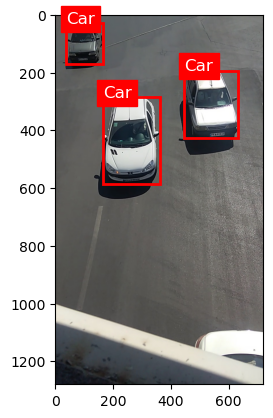

In [4]:
image_path = './dataset/images/train/160.jpg'
annotation_path = './dataset/labels/train/160.txt'
draw_bbox(image_path, annotation_path, class_names)

In [5]:
os.environ['WANDB_MODE'] = 'disabled'
cwd = os.getcwd() ## Current Path
model = YOLO('yolov8n.pt')
results = model.train(data=os.path.join(cwd, "dataset","data.yaml"), epochs=1000, imgsz=640, batch = 16)

New https://pypi.org/project/ultralytics/8.2.41 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 5927MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/tanub/work/Vehicle-Tracking/YOLO/dataset/data.yaml, epochs=1000, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retin

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home/tanub/work/Vehicle-Tracking/YOLO/dataset/labels/train.cache... 1142 images, 54 backgrounds, 1 corrupt: 100%|██████████| 1196/1196 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/tanub/work/Vehicle-Tracking/YOLO/dataset/images/train/178.jpg: ignoring corrupt image/label: negative label values [  -0.017969]



val: Scanning /home/tanub/work/Vehicle-Tracking/YOLO/dataset/labels/val.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000       2.3G     0.9899      2.535      1.126         45        640: 100%|██████████| 75/75 [00:12<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        117        285      0.981     0.0922      0.196      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      2.27G      1.003      1.674      1.125         41        640: 100%|██████████| 75/75 [00:11<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        117        285      0.269      0.395      0.294      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      2.28G      1.071      1.586      1.174         64        640: 100%|██████████| 75/75 [00:11<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all        117        285      0.296      0.444      0.367      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      2.27G      1.105      1.531      1.184         53        640: 100%|██████████| 75/75 [00:11<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        117        285      0.362      0.306      0.295       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      2.28G      1.092      1.503      1.193         32        640: 100%|██████████| 75/75 [00:11<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        117        285      0.375      0.385      0.278      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      2.26G      1.105      1.421      1.195         45        640: 100%|██████████| 75/75 [00:11<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all        117        285      0.349      0.354      0.345      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      2.28G        1.1      1.403      1.199         31        640: 100%|██████████| 75/75 [00:11<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        117        285      0.281       0.38      0.307      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      2.28G      1.095      1.347      1.193         63        640: 100%|██████████| 75/75 [00:11<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]

                   all        117        285      0.421      0.463      0.379      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      2.28G       1.08        1.3      1.193         55        640: 100%|██████████| 75/75 [00:11<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all        117        285      0.721      0.423      0.496      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      2.26G      1.085      1.228       1.19         61        640: 100%|██████████| 75/75 [00:11<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all        117        285       0.53       0.42      0.465       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      2.28G      1.051      1.217      1.171         74        640: 100%|██████████| 75/75 [00:11<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all        117        285      0.504      0.417      0.462      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      2.15G      1.046      1.161      1.171         44        640: 100%|██████████| 75/75 [00:11<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        117        285      0.534      0.522      0.539      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      2.27G      1.037      1.158      1.168         38        640: 100%|██████████| 75/75 [00:11<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]

                   all        117        285      0.715      0.413      0.528      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      2.28G      1.051      1.145       1.17         55        640: 100%|██████████| 75/75 [00:11<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]

                   all        117        285      0.563       0.45      0.514       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      2.27G      1.028        1.1      1.157         61        640: 100%|██████████| 75/75 [00:11<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all        117        285      0.665      0.463       0.51       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      2.28G      1.001      1.056      1.145         45        640: 100%|██████████| 75/75 [00:11<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        117        285      0.643      0.473       0.57      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      2.29G      1.012      1.039      1.148         44        640: 100%|██████████| 75/75 [00:11<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        117        285      0.676      0.492      0.548      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      2.28G      1.021      1.058       1.15         48        640: 100%|██████████| 75/75 [00:11<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all        117        285      0.602      0.501      0.554      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      2.28G      1.007       1.03      1.145         47        640: 100%|██████████| 75/75 [00:12<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        117        285      0.566      0.633      0.621      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      2.26G     0.9939      1.007      1.131         51        640: 100%|██████████| 75/75 [00:11<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all        117        285      0.595        0.6      0.639      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      2.28G     0.9928      1.014       1.14         44        640: 100%|██████████| 75/75 [00:11<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        117        285        0.7      0.643      0.675      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      2.27G     0.9805     0.9738      1.123         58        640: 100%|██████████| 75/75 [00:11<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all        117        285      0.593      0.604      0.615       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      2.25G     0.9886     0.9804      1.135         31        640: 100%|██████████| 75/75 [00:11<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all        117        285      0.652      0.562      0.622       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      2.28G     0.9883     0.9667      1.134         63        640: 100%|██████████| 75/75 [00:12<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all        117        285      0.617      0.671      0.633      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      2.28G     0.9756     0.9547      1.123         44        640: 100%|██████████| 75/75 [00:11<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        117        285      0.728      0.563       0.62      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      2.27G     0.9509     0.9248       1.11         38        640: 100%|██████████| 75/75 [00:12<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        117        285      0.569       0.56      0.561      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      2.28G     0.9305      0.891      1.093         48        640: 100%|██████████| 75/75 [00:12<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]

                   all        117        285      0.737      0.493      0.587      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      2.27G     0.9677       0.93      1.117         39        640: 100%|██████████| 75/75 [00:11<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.10it/s]

                   all        117        285      0.719      0.481      0.593      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      2.26G     0.9748     0.9317       1.12         46        640: 100%|██████████| 75/75 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.06it/s]

                   all        117        285      0.644      0.591      0.641      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      2.29G     0.9503     0.8974      1.108         44        640: 100%|██████████| 75/75 [00:11<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]

                   all        117        285      0.694      0.576      0.643      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      2.27G     0.9319     0.8853      1.101         46        640: 100%|██████████| 75/75 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]

                   all        117        285      0.805      0.552      0.668      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      2.28G     0.9424     0.8816      1.101         67        640: 100%|██████████| 75/75 [00:11<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]

                   all        117        285      0.569      0.664      0.645      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      2.24G      0.952     0.8844      1.115         54        640: 100%|██████████| 75/75 [00:11<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all        117        285      0.664      0.543      0.645      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      2.28G     0.9321     0.8656      1.103         38        640: 100%|██████████| 75/75 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]

                   all        117        285      0.716      0.539      0.654      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      2.25G     0.9239     0.8663      1.098         39        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.10it/s]

                   all        117        285      0.665      0.631      0.674       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      2.25G      0.926     0.8496      1.106         40        640: 100%|██████████| 75/75 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.22it/s]

                   all        117        285      0.663      0.542      0.619      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      2.24G     0.9217     0.8589      1.098         41        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]

                   all        117        285      0.613      0.609      0.651      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      2.27G     0.9321     0.8657      1.103         52        640: 100%|██████████| 75/75 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]

                   all        117        285      0.713      0.606      0.621      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      2.15G     0.9255      0.822      1.086         54        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]

                   all        117        285      0.627      0.608      0.642      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      2.28G     0.9185     0.8178      1.089         41        640: 100%|██████████| 75/75 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.16it/s]

                   all        117        285      0.726      0.563      0.665      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      2.29G     0.9174     0.8421      1.093         46        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]

                   all        117        285      0.687      0.592      0.603      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      2.26G      0.934     0.8151      1.088         57        640: 100%|██████████| 75/75 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]

                   all        117        285      0.749      0.549      0.626      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      2.27G      0.919     0.8083      1.092         46        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]

                   all        117        285      0.746      0.642      0.683      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      2.16G     0.9088     0.7945      1.086         65        640: 100%|██████████| 75/75 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all        117        285      0.647      0.617      0.615      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      2.28G     0.8937     0.7912      1.078         54        640: 100%|██████████| 75/75 [00:11<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.37it/s]

                   all        117        285      0.814      0.573      0.654      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      2.28G     0.8893     0.7718       1.07         56        640: 100%|██████████| 75/75 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.48it/s]

                   all        117        285      0.716      0.583      0.681      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      2.28G     0.9185     0.8086      1.097         47        640: 100%|██████████| 75/75 [00:11<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        117        285      0.723      0.573      0.668      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      2.25G       0.89     0.7691      1.064         47        640: 100%|██████████| 75/75 [00:11<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]

                   all        117        285      0.681      0.558      0.604        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      2.28G     0.8731     0.7769      1.065         49        640: 100%|██████████| 75/75 [00:11<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]

                   all        117        285      0.803      0.603      0.703      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      2.27G     0.8957     0.7825       1.08         48        640: 100%|██████████| 75/75 [00:11<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]

                   all        117        285      0.697      0.525      0.612       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      2.27G     0.8892     0.7714      1.075         47        640: 100%|██████████| 75/75 [00:11<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]

                   all        117        285      0.724      0.601      0.669      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      2.27G     0.8724     0.7498      1.066         51        640: 100%|██████████| 75/75 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.19it/s]

                   all        117        285      0.687      0.625      0.686      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      2.28G     0.8825     0.7549      1.063         64        640: 100%|██████████| 75/75 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all        117        285      0.634      0.651       0.67      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      2.28G     0.8771     0.7539      1.072         45        640: 100%|██████████| 75/75 [00:11<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]

                   all        117        285      0.624      0.637       0.67      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      2.26G     0.8648     0.7631      1.069         49        640: 100%|██████████| 75/75 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all        117        285      0.618      0.664      0.672      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      2.28G     0.8874     0.7606      1.074         50        640: 100%|██████████| 75/75 [00:11<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]

                   all        117        285      0.781      0.587      0.689      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      2.28G     0.8577     0.7342      1.067         38        640: 100%|██████████| 75/75 [00:11<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.12it/s]

                   all        117        285      0.783      0.569      0.661      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      2.27G     0.8828     0.7486      1.072         52        640: 100%|██████████| 75/75 [00:11<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.37it/s]

                   all        117        285      0.567      0.717      0.692      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      2.28G     0.8577     0.7283      1.065         52        640: 100%|██████████| 75/75 [00:11<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.25it/s]

                   all        117        285      0.647      0.578      0.638      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      2.28G     0.8525     0.7281      1.059         74        640: 100%|██████████| 75/75 [00:11<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.32it/s]

                   all        117        285      0.651      0.615      0.674      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      2.28G     0.8577      0.736      1.062         52        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]

                   all        117        285      0.799      0.571      0.694      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      2.27G     0.8515     0.7051      1.058         84        640: 100%|██████████| 75/75 [00:11<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.49it/s]

                   all        117        285      0.684      0.611      0.641       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      2.28G     0.8575     0.7238      1.069         47        640: 100%|██████████| 75/75 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.34it/s]

                   all        117        285      0.791      0.628       0.74       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      2.25G     0.8514     0.7059      1.051         43        640: 100%|██████████| 75/75 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.46it/s]

                   all        117        285      0.636      0.725      0.753      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      2.26G      0.869     0.7281      1.062         49        640: 100%|██████████| 75/75 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]

                   all        117        285      0.603      0.641      0.613      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      2.28G      0.843     0.6975      1.052         36        640: 100%|██████████| 75/75 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]

                   all        117        285      0.807      0.593      0.724      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      2.25G     0.8511      0.708      1.059         53        640: 100%|██████████| 75/75 [00:11<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        117        285      0.778      0.606      0.717      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      2.28G     0.8443     0.7022      1.045         59        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]

                   all        117        285      0.746      0.619      0.684      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      2.28G     0.8468     0.7154      1.046         42        640: 100%|██████████| 75/75 [00:11<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all        117        285      0.632       0.66      0.659      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      2.28G     0.8341     0.6862      1.047         40        640: 100%|██████████| 75/75 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.32it/s]

                   all        117        285      0.752      0.606      0.677      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      2.27G     0.8443     0.6951      1.056         56        640: 100%|██████████| 75/75 [00:11<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]

                   all        117        285      0.566      0.716      0.706      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      2.27G     0.8249     0.6811      1.041         63        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]

                   all        117        285      0.656      0.697      0.719      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      2.28G     0.8434     0.6901      1.053         30        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]

                   all        117        285       0.84      0.539      0.716      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      2.29G     0.8425     0.6857      1.056         34        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]

                   all        117        285      0.768      0.618      0.695      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      2.28G     0.8285     0.6661      1.038         36        640: 100%|██████████| 75/75 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]

                   all        117        285      0.716      0.672      0.702      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      2.15G     0.8274     0.6793      1.042         51        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.45it/s]

                   all        117        285      0.735      0.651      0.716      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      2.28G      0.839     0.6801      1.055         47        640: 100%|██████████| 75/75 [00:11<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]

                   all        117        285      0.812      0.662       0.73      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      2.16G     0.8356     0.6884      1.044         49        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]

                   all        117        285      0.685      0.676      0.712       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      2.28G     0.8141     0.6686      1.041         37        640: 100%|██████████| 75/75 [00:11<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.45it/s]

                   all        117        285      0.661      0.662      0.701      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      2.28G     0.8409     0.6671      1.049         42        640: 100%|██████████| 75/75 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all        117        285      0.695      0.579      0.669      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      2.28G     0.8184     0.6598      1.044         48        640: 100%|██████████| 75/75 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.11it/s]

                   all        117        285      0.656      0.707      0.715      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      2.29G     0.8179       0.67      1.044         65        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]

                   all        117        285       0.76      0.667      0.731      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      2.24G      0.831      0.662      1.042         55        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        117        285      0.882      0.557      0.728      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      2.28G     0.8202      0.653      1.036         64        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]

                   all        117        285      0.651      0.693      0.715      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      2.28G     0.8166     0.6372      1.039         62        640: 100%|██████████| 75/75 [00:11<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.04it/s]

                   all        117        285      0.769      0.608      0.686      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      2.28G     0.8159     0.6487      1.033         66        640: 100%|██████████| 75/75 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.42it/s]

                   all        117        285      0.772      0.633      0.711      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      2.15G     0.8218     0.6358      1.035         45        640: 100%|██████████| 75/75 [00:11<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]

                   all        117        285      0.768      0.597      0.717        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      2.16G     0.8215     0.6585      1.031         41        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]

                   all        117        285      0.621      0.689      0.728      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      2.27G     0.8059     0.6388      1.025         60        640: 100%|██████████| 75/75 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]

                   all        117        285      0.573      0.691      0.687      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      2.27G     0.7931     0.6336      1.034         39        640: 100%|██████████| 75/75 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]

                   all        117        285      0.752      0.642      0.686       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      2.26G     0.8034     0.6434      1.028         49        640: 100%|██████████| 75/75 [00:11<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]

                   all        117        285      0.747      0.552      0.671      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      2.28G     0.8007     0.6243      1.023         85        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]

                   all        117        285      0.816      0.599      0.733      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      2.25G     0.8209     0.6503       1.04         67        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]

                   all        117        285      0.755      0.612      0.679      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      2.28G     0.8078     0.6355      1.026         67        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.53it/s]

                   all        117        285       0.69      0.561      0.676      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      2.26G     0.8007     0.6269      1.025         30        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]

                   all        117        285      0.836      0.606      0.725      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      2.28G     0.7941     0.6127       1.02         55        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        117        285      0.898       0.64      0.725      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      2.28G     0.8058     0.6443      1.036         49        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.42it/s]

                   all        117        285      0.677      0.622      0.669      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      2.27G     0.8024       0.63      1.024         37        640: 100%|██████████| 75/75 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]

                   all        117        285      0.634      0.693      0.725      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      2.28G     0.7922     0.6112      1.027         61        640: 100%|██████████| 75/75 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.34it/s]

                   all        117        285      0.676      0.658      0.706      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      2.28G     0.7958     0.6483      1.031         52        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        117        285      0.755      0.596      0.663      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      2.28G     0.7984     0.6352      1.033         49        640: 100%|██████████| 75/75 [00:11<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.33it/s]

                   all        117        285      0.733      0.573      0.671      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      2.28G      0.785     0.6021       1.01         68        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.33it/s]

                   all        117        285       0.67      0.673      0.704      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      2.25G      0.787     0.6191      1.018         38        640: 100%|██████████| 75/75 [00:11<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]

                   all        117        285      0.822      0.598      0.697      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      2.28G     0.7936     0.6093      1.023         51        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]

                   all        117        285      0.806      0.632      0.722      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      2.28G     0.7823     0.6102      1.019         38        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.37it/s]

                   all        117        285      0.809      0.601      0.691      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      2.28G     0.7817     0.6101      1.025         43        640: 100%|██████████| 75/75 [00:11<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]

                   all        117        285      0.676      0.623      0.715      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      2.28G     0.7973     0.6135      1.017         51        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]

                   all        117        285      0.735      0.642       0.69      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      2.15G     0.7941     0.6069      1.028         67        640: 100%|██████████| 75/75 [00:11<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.39it/s]

                   all        117        285      0.778       0.69      0.727      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      2.28G     0.7728     0.5925      1.014         56        640: 100%|██████████| 75/75 [00:11<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]

                   all        117        285      0.661      0.584      0.645      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      2.29G     0.7894     0.6107      1.018         42        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.34it/s]

                   all        117        285      0.767      0.617      0.688       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      2.27G     0.7873     0.6049      1.025         37        640: 100%|██████████| 75/75 [00:11<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all        117        285      0.703      0.623      0.696      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      2.28G     0.7823     0.5999      1.015         43        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.19it/s]

                   all        117        285      0.715      0.687      0.703      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      2.27G     0.7685     0.5924      1.014         62        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.41it/s]

                   all        117        285      0.787      0.683      0.725      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      2.29G     0.7819     0.6116       1.02         46        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.34it/s]

                   all        117        285      0.855      0.623      0.679      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      2.26G     0.7615     0.5971      1.008         80        640: 100%|██████████| 75/75 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]

                   all        117        285      0.768      0.548      0.662      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      2.26G     0.7532     0.5718      1.001         49        640: 100%|██████████| 75/75 [00:11<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.39it/s]

                   all        117        285       0.75      0.593      0.679      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      2.29G     0.7683     0.5769      1.012         43        640: 100%|██████████| 75/75 [00:11<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.37it/s]

                   all        117        285       0.67       0.66       0.69      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      2.25G     0.7619      0.577      1.019         46        640: 100%|██████████| 75/75 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]

                   all        117        285      0.768      0.666      0.727      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      2.25G     0.7802     0.6012      1.018         32        640: 100%|██████████| 75/75 [00:11<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]

                   all        117        285      0.728      0.623      0.693      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      2.27G     0.7632     0.5761      1.008         44        640: 100%|██████████| 75/75 [00:11<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.32it/s]

                   all        117        285      0.769      0.556      0.632      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      2.28G      0.784     0.6038      1.028         49        640: 100%|██████████| 75/75 [00:11<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all        117        285      0.728      0.569      0.659      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      2.27G     0.7674     0.5712      1.008         34        640: 100%|██████████| 75/75 [00:11<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]

                   all        117        285      0.634      0.633      0.681      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      2.26G     0.7632     0.5738      1.011         50        640: 100%|██████████| 75/75 [00:11<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]

                   all        117        285      0.805      0.587      0.658      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      2.28G     0.7568     0.5833      1.014         58        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]

                   all        117        285      0.778      0.606      0.694      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      2.28G     0.7655       0.58      1.009         50        640: 100%|██████████| 75/75 [00:11<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]

                   all        117        285       0.74      0.516      0.659      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      2.27G     0.7444     0.5631     0.9955         41        640: 100%|██████████| 75/75 [00:11<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]

                   all        117        285      0.668      0.643      0.696      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      2.28G     0.7789     0.5751      1.011         43        640: 100%|██████████| 75/75 [00:11<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]

                   all        117        285       0.75      0.683      0.741      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      2.28G     0.7519     0.5698      1.001         36        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]

                   all        117        285      0.749      0.638      0.709      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      2.29G     0.7478     0.5689     0.9952         35        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]

                   all        117        285      0.798      0.614      0.737      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      2.15G     0.7463     0.5703     0.9931         44        640: 100%|██████████| 75/75 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all        117        285      0.849       0.57      0.699      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      2.25G      0.743     0.5536      0.995         60        640: 100%|██████████| 75/75 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]

                   all        117        285      0.855      0.527      0.679      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      2.29G     0.7375     0.5769      1.002         42        640: 100%|██████████| 75/75 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.49it/s]

                   all        117        285      0.728       0.62      0.702      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      2.28G      0.758     0.5721      1.005         52        640: 100%|██████████| 75/75 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.33it/s]

                   all        117        285      0.823      0.613      0.699      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      2.28G     0.7469     0.5693          1         54        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.37it/s]

                   all        117        285      0.767      0.684      0.731      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      2.28G     0.7466     0.5547      1.003         53        640: 100%|██████████| 75/75 [00:11<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]

                   all        117        285       0.78      0.607      0.708      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      2.28G     0.7558     0.5648      1.002         42        640: 100%|██████████| 75/75 [00:11<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.34it/s]

                   all        117        285      0.791      0.606        0.7      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      2.28G     0.7546      0.555     0.9993         38        640: 100%|██████████| 75/75 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.37it/s]

                   all        117        285      0.735      0.578       0.68      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      2.28G     0.7464     0.5589      1.001         73        640: 100%|██████████| 75/75 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.48it/s]

                   all        117        285      0.781      0.599      0.703      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      2.26G      0.743     0.5486     0.9919         54        640: 100%|██████████| 75/75 [00:11<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.46it/s]

                   all        117        285      0.743      0.628      0.696      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      2.28G     0.7381     0.5447     0.9854         61        640: 100%|██████████| 75/75 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.22it/s]

                   all        117        285      0.754      0.587      0.664      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      2.27G     0.7441     0.5601      1.001         61        640: 100%|██████████| 75/75 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.11it/s]

                   all        117        285      0.738      0.577      0.655      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      2.28G     0.7419     0.5477     0.9938         47        640: 100%|██████████| 75/75 [00:11<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.50it/s]

                   all        117        285      0.779      0.639      0.704      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      2.27G     0.7156     0.5292     0.9885         39        640: 100%|██████████| 75/75 [00:11<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]

                   all        117        285      0.657      0.622      0.697       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      2.27G     0.7492     0.5592      1.001         42        640: 100%|██████████| 75/75 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]

                   all        117        285      0.756      0.634      0.708      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      2.27G     0.7402     0.5477      1.002         47        640: 100%|██████████| 75/75 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.40it/s]

                   all        117        285       0.73      0.558      0.649      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      2.26G     0.7329     0.5456     0.9932         51        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.34it/s]

                   all        117        285      0.715      0.624      0.671      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      2.28G     0.7498     0.5514     0.9909         49        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.45it/s]

                   all        117        285       0.82      0.608      0.668      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      2.27G     0.7339     0.5669      1.004         46        640: 100%|██████████| 75/75 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.46it/s]

                   all        117        285      0.749       0.68      0.721      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      2.26G     0.7352     0.5564     0.9996         59        640: 100%|██████████| 75/75 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.33it/s]

                   all        117        285      0.755      0.596      0.718      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      2.28G     0.7238     0.5298     0.9897         37        640: 100%|██████████| 75/75 [00:11<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]

                   all        117        285      0.773       0.62      0.691      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      2.26G      0.728     0.5294      0.992         38        640: 100%|██████████| 75/75 [00:11<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.41it/s]

                   all        117        285      0.802      0.577      0.698      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      2.28G     0.7344     0.5451     0.9914         36        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        117        285      0.769      0.565       0.67      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      2.28G     0.7252     0.5322     0.9898         43        640: 100%|██████████| 75/75 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]

                   all        117        285       0.78      0.551      0.638      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      2.28G     0.7267      0.542     0.9944         38        640: 100%|██████████| 75/75 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]

                   all        117        285      0.672      0.593      0.675      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      2.27G     0.7404     0.5427     0.9965         55        640: 100%|██████████| 75/75 [00:11<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.41it/s]

                   all        117        285      0.672      0.661      0.692      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      2.27G     0.7133     0.5266     0.9875         49        640: 100%|██████████| 75/75 [00:11<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        117        285      0.756      0.539      0.664      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      2.28G      0.727     0.5281     0.9876         46        640: 100%|██████████| 75/75 [00:11<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.49it/s]

                   all        117        285      0.702      0.677      0.728      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      2.28G     0.7285      0.551     0.9967         44        640: 100%|██████████| 75/75 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]

                   all        117        285      0.716      0.626      0.698      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      2.26G     0.7135     0.5264     0.9841         56        640: 100%|██████████| 75/75 [00:11<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.47it/s]

                   all        117        285      0.769      0.637      0.721      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      2.26G     0.7143     0.5393     0.9953         58        640: 100%|██████████| 75/75 [00:11<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.33it/s]

                   all        117        285      0.659      0.654      0.693      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      2.29G     0.7171     0.5163     0.9818         27        640: 100%|██████████| 75/75 [00:11<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]

                   all        117        285      0.794      0.623      0.702      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      2.27G     0.7324     0.5328     0.9942         55        640: 100%|██████████| 75/75 [00:11<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]

                   all        117        285      0.752      0.674      0.708      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      2.27G      0.713     0.5303     0.9834         65        640: 100%|██████████| 75/75 [00:11<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.19it/s]

                   all        117        285      0.792      0.574       0.67      0.479
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 63, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



163 epochs completed in 0.556 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 5927MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]


                   all        117        285       0.79      0.628       0.74       0.53
                   Car        117        225      0.798      0.791      0.847      0.678
            Motorcycle        117         19      0.774      0.632      0.732      0.435
                 Truck        117         24      0.655      0.317      0.454      0.319
                   Bus        117          9      0.874      0.773      0.849      0.711
               Bicycle        117          8      0.847      0.625      0.818      0.508
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


Testing with image

In [6]:
test = './dataset/images/test/img1048.jpg'


0: 640x640 6 Cars, 8.4ms
Speed: 4.3ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


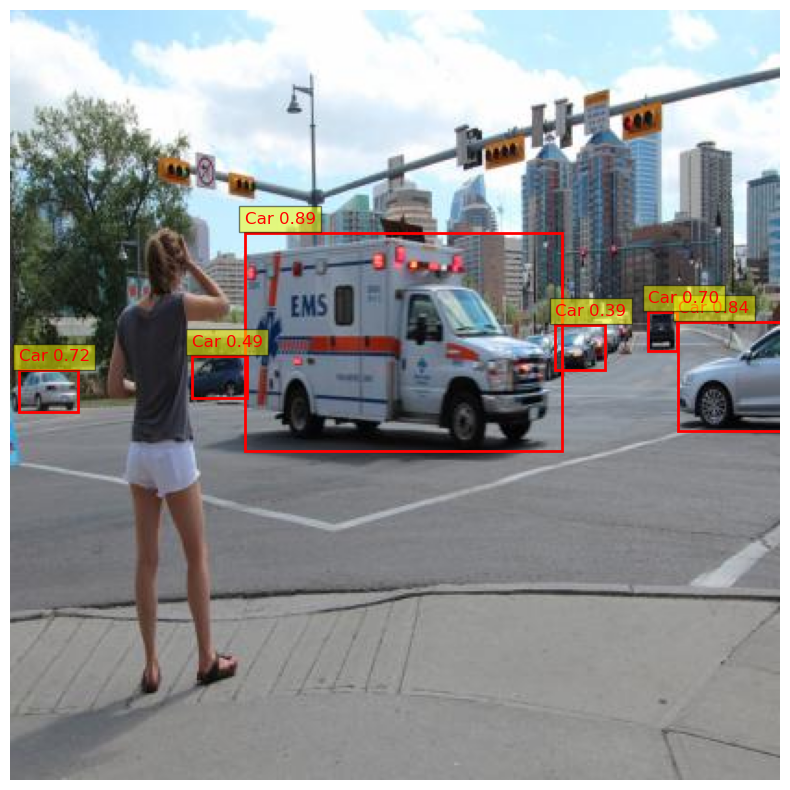

In [47]:
results = model([test])  

def plot_results(img, result):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    # Plot bounding boxes with text
    if result.boxes is not None:
        for i in range(len(result.boxes.xyxy)):
            x1, y1, x2, y2 = result.boxes.xyxy[i].cpu()
            conf = result.boxes.conf[i].cpu()
            
            cls = result.boxes.cls[i].cpu()
            label = f"{model.names[int(cls)]} {conf:.2f}"  # Class label and confidence
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', facecolor='none', linewidth=2))
            plt.text(x1, y1 - 5, label, color='red', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))

    plt.axis('off')
    plt.show()

# Process results list
for i, result in enumerate(results):
    # Load the image using OpenCV
    img = cv2.imread(test)
    # Display the result using Matplotlib
    plot_results(img, result)
